In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/processed/segmento1_csv/cooperativas_segmento1_completo_final.csv")

print("Shape:", df.shape)
df.head(43)

Shape: (42, 46)


,INSTITUCIÓN,SEGMENTO,CALIFICADORA,CALIFICACIÓN,RANKING,( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZADOS,ACTIVOS IMPRODUCTIVOS NETOS / TOTAL ACTIVOS,ACTIVOS PRODUCTIVOS / TOTAL ACTIVOS,ACTIVOS PRODUCTIVOS / PASIVOS CON COSTO,MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO,...,RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO POR VENCER,CARTERAS DE CRÉDITOS REFINANCIADAS,CARTERAS DE CRÉDITOS REESTRUCTURADAS,CARTERA POR VENCER TOTAL,FONDOS DISPONIBLES / TOTAL DEPOSITOS A CORTO PLAZO,CARTERA IMPRODUCTIVA DESCUBIERTA / (PATRIMONIO + RESULTADOS),CARTERA IMPRODUCTIVA / PATRIMONIO (DIC),FK = (PATRIMONIO + RESULTADOS - INGRESOS EXTRAORDINARIOS) / ACTIVOS TOTALES,FI = 1 + (ACTIVOS IMPRODUCTIVOS / ACTIVOS TOTALES),INDICE DE CAPITALIZACION NETO: FK / FI
0,PEQUEÑA EMPRESA DE COTOPAXI LIMITADA,SEGMENTO 1,PACIFIC CREDIT RATING S.A.,AAA,1,-233.715,0.025,0.975,1.282,0.030,...,0.000,0.166,0.190,0.161,0.374,0.000,0.311,0.202,1.025,0.197
1,29 DE OCTUBRE LTDA,SEGMENTO 1,RIESGOS / CLASS INTERNATIONAL RATING,AA,2,2.184,0.073,0.927,1.040,0.055,...,0.000,0.146,0.137,0.151,0.278,0.157,0.857,0.084,1.073,0.079
2,ANDALUCIA LIMITADA,SEGMENTO 1,SUMMA RATINGS S.A. UNION RATINGS S.A. / PACIFIC,AA,2,0.600,0.193,0.807,0.913,0.000,...,0.000,0.154,0.170,0.147,0.359,0.000,0.450,0.094,1.193,0.079
3,ALIANZA DEL VALLE LIMITADA,SEGMENTO 1,RIESGOS / SUMMA RATINGS S.A.,AA,2,1.648,0.095,0.905,1.046,0.000,...,0.000,0.130,0.133,0.155,0.349,0.000,0.482,0.101,1.095,0.092
4,DE LOS\nSERVIDORES PUBLICOS DEL MINISTERIO DE\...,SEGMENTO 1,UNION RATINGS S.A.,AA,2,11.282,0.042,0.958,1.317,0.000,...,0.000,0.116,0.112,0.118,0.345,0.000,0.043,0.244,1.042,0.234
5,RIOBAMBA LTDA,SEGMENTO 1,RIESGOS S.A. MICRORIESG,AA,2,12.343,0.045,0.955,1.180,0.016,...,0.000,0.156,0.191,0.140,0.434,0.000,0.161,0.161,1.045,0.154
6,PEQUEÑA EMPRESA DE PASTAZA LIMITADA,SEGMENTO 1,CLASS INTERNATIONAL RATING,AA,2,7.345,0.069,0.931,1.165,0.000,...,0.000,0.189,0.238,0.160,0.344,0.000,0.206,0.163,1.069,0.152
7,ATUNTAQUI LIMITADA,SEGMENTO 1,CREDIT RATING S.A. MICROFINANZA CALIFICADORA DE,AA,2,2.400,0.061,0.939,1.037,0.016,...,0.000,0.152,0.150,0.136,0.365,0.000,0.625,0.069,1.061,0.065
8,JARDIN AZUAYO LIMITADA,SEGMENTO 1,WATCH RATINGS S.A.,AA,2,-22.964,0.039,0.961,1.101,0.087,...,0.000,0.159,0.304,0.148,0.492,0.000,0.364,0.103,1.039,0.099
9,JUVENTUD ECUATORIANA PROGRESISTA\nLIMITADA,SEGMENTO 1,RATINGS S.A.,AA,2,2.254,0.094,0.906,1.039,0.002,...,0.000,0.179,0.171,0.144,0.323,0.000,0.423,0.098,1.094,0.089


In [40]:
df_num = df.copy()

# Convertir TODO lo convertible a número
for col in df_num.columns:
    df_num[col] = pd.to_numeric(df_num[col], errors="ignore")

# Seleccionar solamente las columnas numéricas reales
num_cols = df_num.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas numéricas detectadas:", len(num_cols))
print(num_cols[:20]) # muestra solo las primeras 20


Columnas numéricas detectadas: 42
['RANKING', '( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZADOS', 'ACTIVOS IMPRODUCTIVOS NETOS / TOTAL ACTIVOS', 'ACTIVOS PRODUCTIVOS / TOTAL ACTIVOS', 'ACTIVOS PRODUCTIVOS / PASIVOS CON COSTO', 'MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO', 'MOROSIDAD DE LA CARTERA DE CONSUMO', 'MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO', 'MOROSIDAD DE LA CARTERA DE MICROCREDITO', 'MOROSIDAD DE LA CARTERA DE VIVIENDA DE INTERES SOCIAL Y PUBLICO', 'MOROSIDAD DE LA CARTERA DE CREDITO EDUCATIVO', 'MOROSIDAD DE LA CARTERA TOTAL', 'COBERTURA DE LA CARTERA DE CREDITO PRODUCTIVO', 'COBERTURA DE LA CARTERA DE CREDITO CONSUMO', 'COBERTURA DE LA CARTERA DE CREDITO INMOBILIARIO', 'COBERTURA DE LA CARTERA DE MICROCREDITO', 'COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES PUBLICO', 'COBERTURA DE LA CARTERA DE CREDITO EDUCATIVO', 'COBERTURA DE LA CARTERA PROBLEMÁTICA', 'GASTOS DE OPERACION ESTIMADOS / TOTAL ACTIVO PROMEDIO ']


/var/folders/qx/nxgck87935xbqxlj9_bplxpc0000gn/T/ipykernel_45123/3501932621.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_num[col] = pd.to_numeric(df_num[col], errors="ignore")


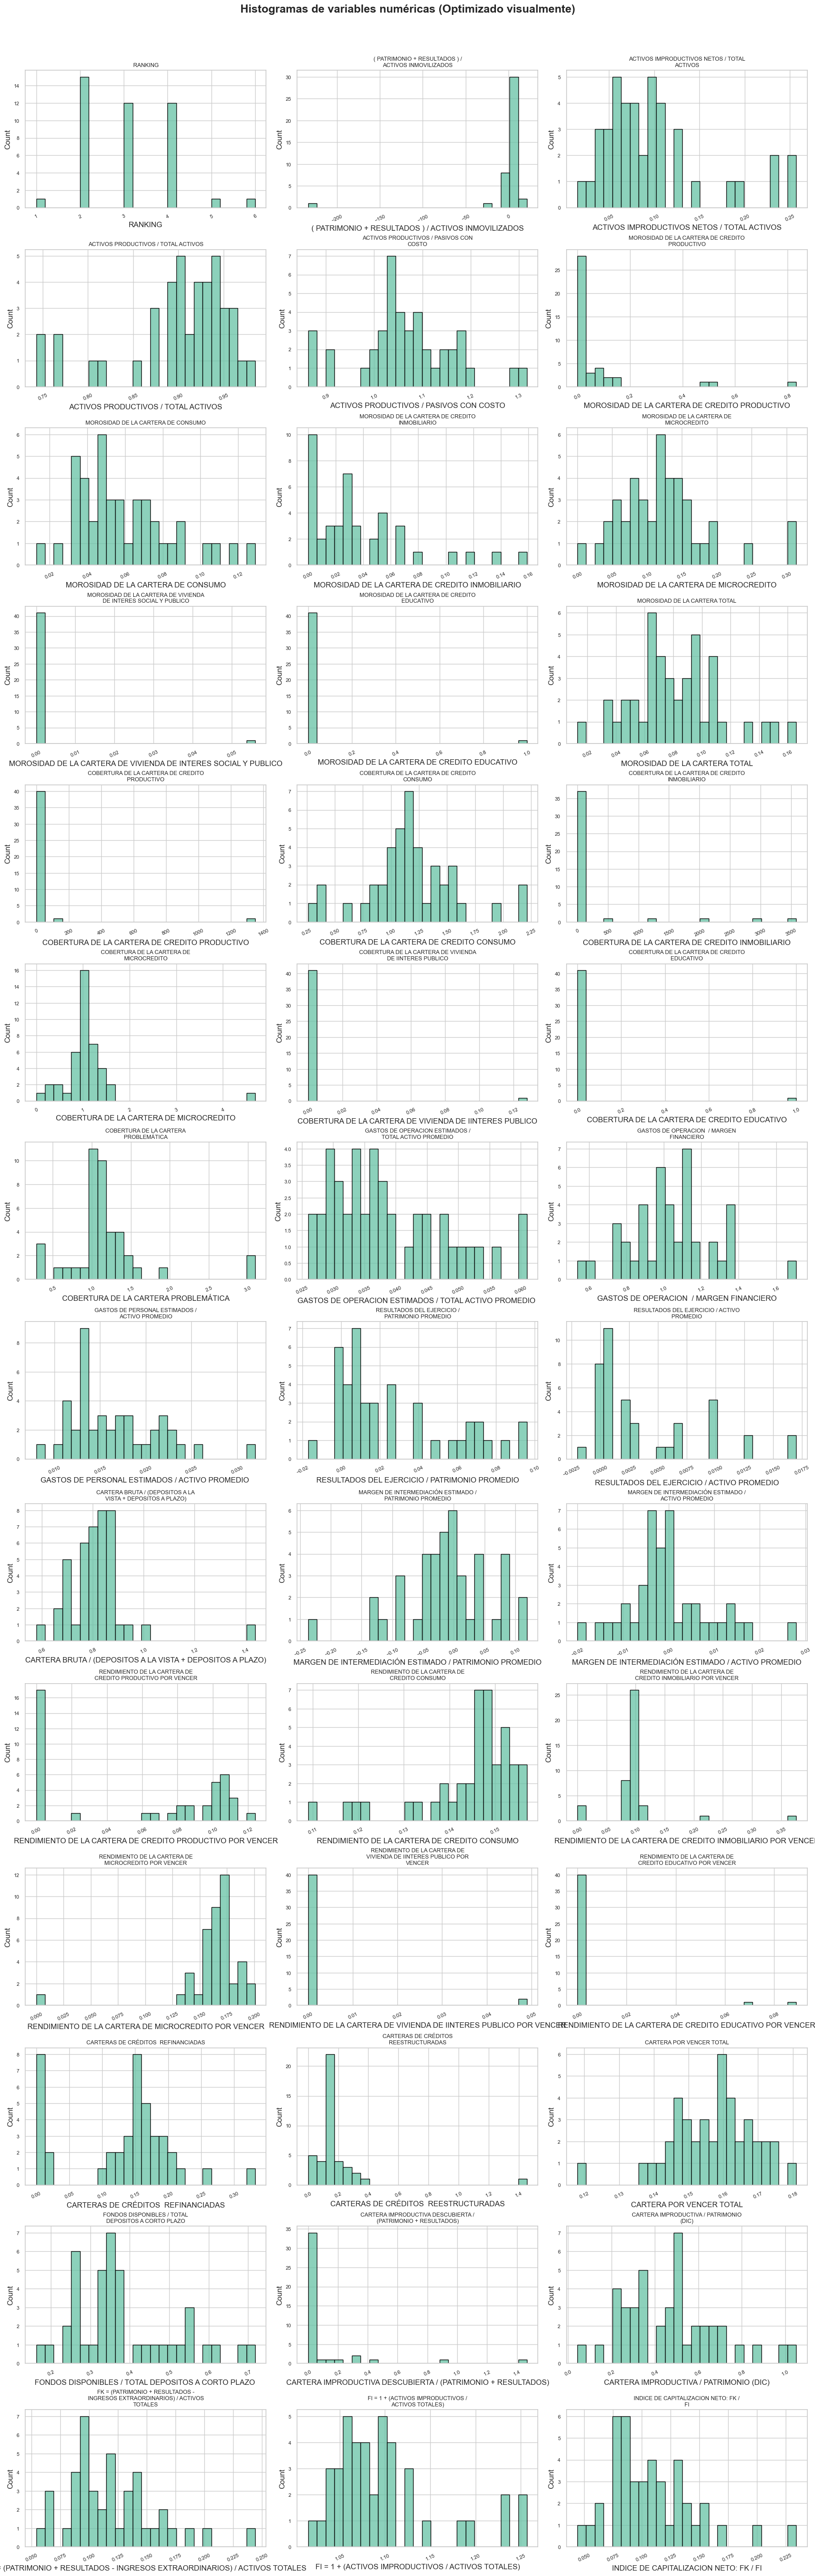

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import math

# Estilo general
sns.set(style="whitegrid", palette="Set2")

# DataFrame numérico ya limpio
df_plot = df_num[num_cols].copy()

# Configuración de grid
ncols = 3                                       # menos columnas → gráficos más grandes
nrows = math.ceil(len(df_plot.columns) / ncols)

fig, axes = plt.subplots(
    nrows,
    ncols,
    figsize=(18, 4 * nrows),
    constrained_layout=True
)
axes = axes.flatten()

for i, col in enumerate(df_plot.columns):
    sns.histplot(
        df_plot[col].dropna(),
        bins=25,
        ax=axes[i],
        edgecolor="black"
    )

    # Título multilínea bonito
    wrapped = "\n".join(textwrap.wrap(col, width=35))
    axes[i].set_title(wrapped, fontsize=9)

    axes[i].tick_params(axis="x", rotation=25, labelsize=8)
    axes[i].tick_params(axis="y", labelsize=8)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Histogramas de variables numéricas (Optimizado visualmente)",
    fontsize=18,
    weight="bold",
    y=1.02
)
plt.show()


Heatmap y correlaciones

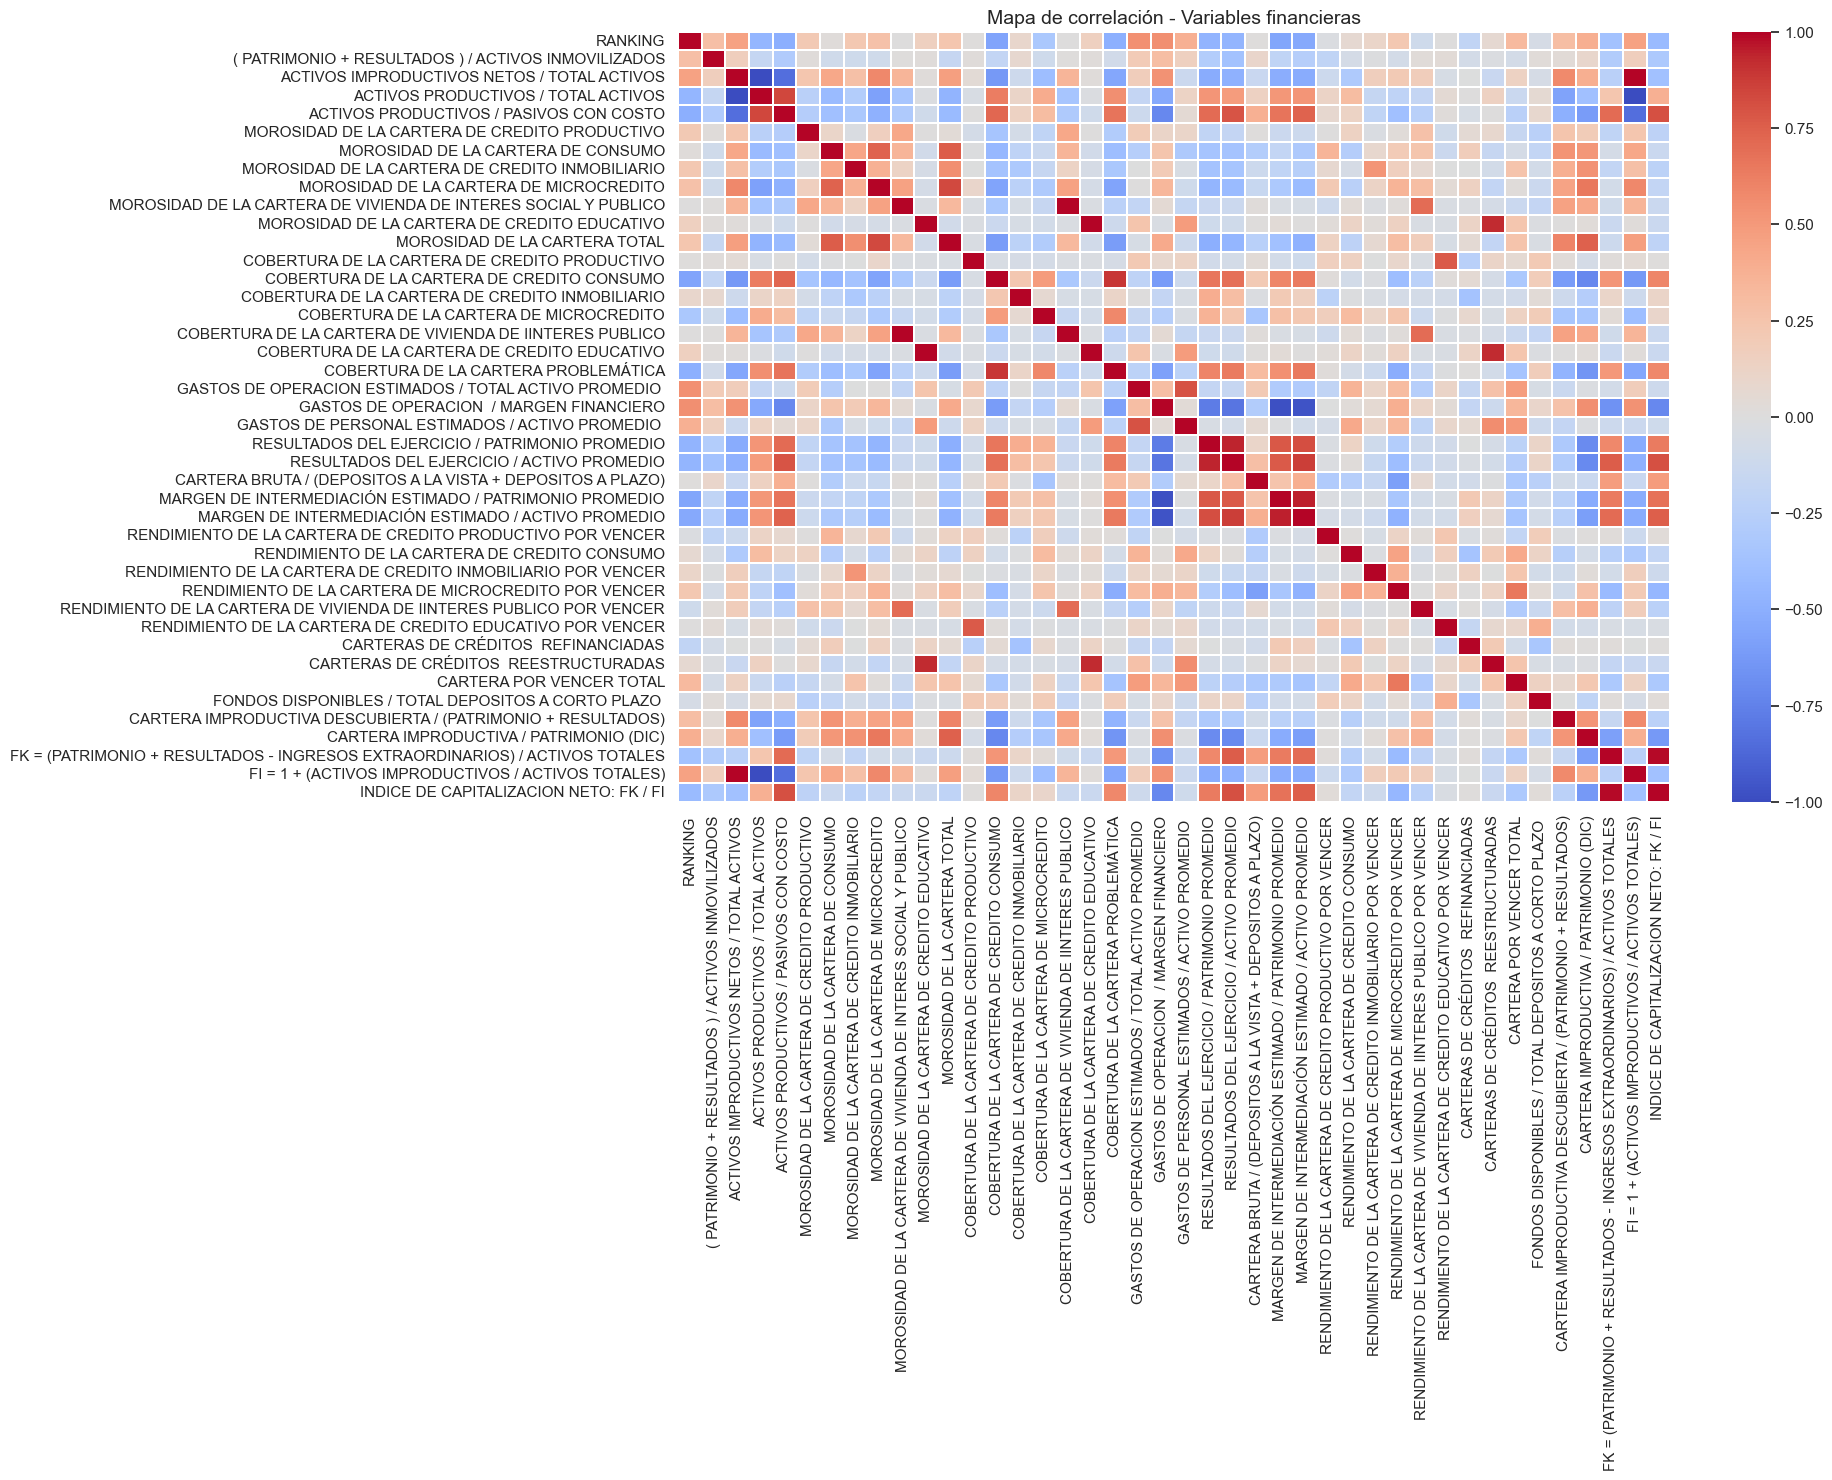


TOP correlaciones más fuertes:

MOROSIDAD DE LA CARTERA DE VIVIENDA DE INTERES SOCIAL Y PUBLICO              COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES PUBLICO                        1.000000
MOROSIDAD DE LA CARTERA DE CREDITO EDUCATIVO                                 COBERTURA DE LA CARTERA DE CREDITO EDUCATIVO                                   1.000000
ACTIVOS IMPRODUCTIVOS NETOS / TOTAL ACTIVOS                                  FI = 1 + (ACTIVOS IMPRODUCTIVOS / ACTIVOS TOTALES)                             1.000000
FK = (PATRIMONIO + RESULTADOS - INGRESOS EXTRAORDINARIOS) / ACTIVOS TOTALES  INDICE DE CAPITALIZACION NETO: FK / FI                                         0.987701
MARGEN DE INTERMEDIACIÓN ESTIMADO / PATRIMONIO PROMEDIO                      MARGEN DE INTERMEDIACIÓN ESTIMADO / ACTIVO PROMEDIO                            0.950554
RESULTADOS DEL EJERCICIO / PATRIMONIO PROMEDIO                               RESULTADOS DEL EJERCICIO / ACTIVO PROMEDIO                       

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_num[num_cols].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.3)
plt.title("Mapa de correlación - Variables financieras", fontsize=14)
plt.show()

# Top correlaciones absolutas
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
)

print("\nTOP correlaciones más fuertes:\n")
print(corr_pairs.head(25))


Eliminación de correlaciones

In [52]:
vars_drop_corr = [
    'MOROSIDAD DE LA CARTERA DE VIVIENDA DE INTERES SOCIAL Y PUBLICO',
    'MOROSIDAD DE LA CARTERA DE CREDITO EDUCATIVO',
    'ACTIVOS IMPRODUCTIVOS NETOS / TOTAL ACTIVOS',
    'FK = (PATRIMONIO + RESULTADOS - INGRESOS EXTRAORDINARIOS) / ACTIVOS TOTALES',
    'MARGEN DE INTERMEDIACIÓN ESTIMADO / PATRIMONIO PROMEDIO',
    'RESULTADOS DEL EJERCICIO / PATRIMONIO PROMEDIO',
    'MOROSIDAD DE LA CARTERA DE MICROCREDITO'
]

df_reducido = df_num.drop(columns=vars_drop_corr)
print("Shape después de reducir:", df_reducido.shape)


Shape después de reducir: (42, 39)


In [54]:
import numpy as np

# 1) Convertir todo a numerico
df_clean = df_reducido.apply(pd.to_numeric, errors="coerce")

# 2) Reemplazar infinitos por NaN
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)

# 3) Eliminar columnas con demasiados NaN
df_clean = df_clean.dropna(axis=1, thresh=int(0.80*len(df_clean)))  # deja columnas con 80%+ datos válidos

# 4) Eliminar filas que aún tengan NaN
df_clean = df_clean.dropna()

print("Shape final para VIF:", df_clean.shape)
df_clean.head()


Shape final para VIF: (42, 35)


,RANKING,( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZADOS,ACTIVOS PRODUCTIVOS / TOTAL ACTIVOS,ACTIVOS PRODUCTIVOS / PASIVOS CON COSTO,MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO,MOROSIDAD DE LA CARTERA DE CONSUMO,MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO,MOROSIDAD DE LA CARTERA TOTAL,COBERTURA DE LA CARTERA DE CREDITO PRODUCTIVO,COBERTURA DE LA CARTERA DE CREDITO CONSUMO,...,RENDIMIENTO DE LA CARTERA DE VIVIENDA DE IINTERES PUBLICO POR VENCER,RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO POR VENCER,CARTERAS DE CRÉDITOS REFINANCIADAS,CARTERAS DE CRÉDITOS REESTRUCTURADAS,CARTERA POR VENCER TOTAL,FONDOS DISPONIBLES / TOTAL DEPOSITOS A CORTO PLAZO,CARTERA IMPRODUCTIVA DESCUBIERTA / (PATRIMONIO + RESULTADOS),CARTERA IMPRODUCTIVA / PATRIMONIO (DIC),FI = 1 + (ACTIVOS IMPRODUCTIVOS / ACTIVOS TOTALES),INDICE DE CAPITALIZACION NETO: FK / FI
0,1,-233.715,0.975,1.282,0.030,0.072,0.056,0.111,3.323,1.650,...,0.0,0.0,0.166,0.190,0.161,0.374,0.000,0.311,1.025,0.197
1,2,2.184,0.927,1.040,0.055,0.089,0.023,0.099,1.000,1.108,...,0.0,0.0,0.146,0.137,0.151,0.278,0.157,0.857,1.073,0.079
2,2,0.600,0.807,0.913,0.000,0.067,0.066,0.073,0.000,1.150,...,0.0,0.0,0.154,0.170,0.147,0.359,0.000,0.450,1.193,0.079
3,2,1.648,0.905,1.046,0.000,0.041,0.000,0.075,0.000,1.365,...,0.0,0.0,0.130,0.133,0.155,0.349,0.000,0.482,1.095,0.092
4,2,11.282,0.958,1.317,0.000,0.013,0.000,0.013,0.000,2.206,...,0.0,0.0,0.116,0.112,0.118,0.345,0.000,0.043,1.042,0.234


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clean.copy()

vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_sorted = vif.sort_values("VIF", ascending=False)
vif_sorted


,variable,VIF
2,ACTIVOS PRODUCTIVOS / TOTAL ACTIVOS,67510.304892
33,FI = 1 + (ACTIVOS IMPRODUCTIVOS / ACTIVOS TOTA...,1738.858932
3,ACTIVOS PRODUCTIVOS / PASIVOS CON COSTO,839.195934
14,COBERTURA DE LA CARTERA PROBLEMÁTICA,553.850817
20,MARGEN DE INTERMEDIACIÓN ESTIMADO / ACTIVO PRO...,414.939646
34,INDICE DE CAPITALIZACION NETO: FK / FI,242.402974
15,GASTOS DE OPERACION ESTIMADOS / TOTAL ACTIVO P...,232.103549
17,GASTOS DE PERSONAL ESTIMADOS / ACTIVO PROMEDIO,217.945975
18,RESULTADOS DEL EJERCICIO / ACTIVO PROMEDIO,192.782407
16,GASTOS DE OPERACION / MARGEN FINANCIERO,176.909398


In [56]:
# Seleccionar variables con VIF <= 10 (aceptables)
variables_finales = vif[vif["VIF"] <= 10]["variable"].values

df_final = df_clean[variables_finales]
df_final.shape, df_final.columns


((42, 11),
 Index(['RANKING', '( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZADOS',
        'MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO',
        'MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO',
        'COBERTURA DE LA CARTERA DE CREDITO INMOBILIARIO',
        'COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES PUBLICO',
        'RENDIMIENTO DE LA CARTERA DE CREDITO PRODUCTIVO POR VENCER',
        'RENDIMIENTO DE LA CARTERA DE CREDITO CONSUMO',
        'RENDIMIENTO DE LA CARTERA DE CREDITO INMOBILIARIO POR VENCER',
        'RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO POR VENCER',
        'FONDOS DISPONIBLES / TOTAL DEPOSITOS A CORTO PLAZO '],
       dtype='object'))

PCA (reducción dimensional y visualización)

Varianza explicada por componente:
PC1: 16.97%
PC2: 15.37%
PC3: 12.82%


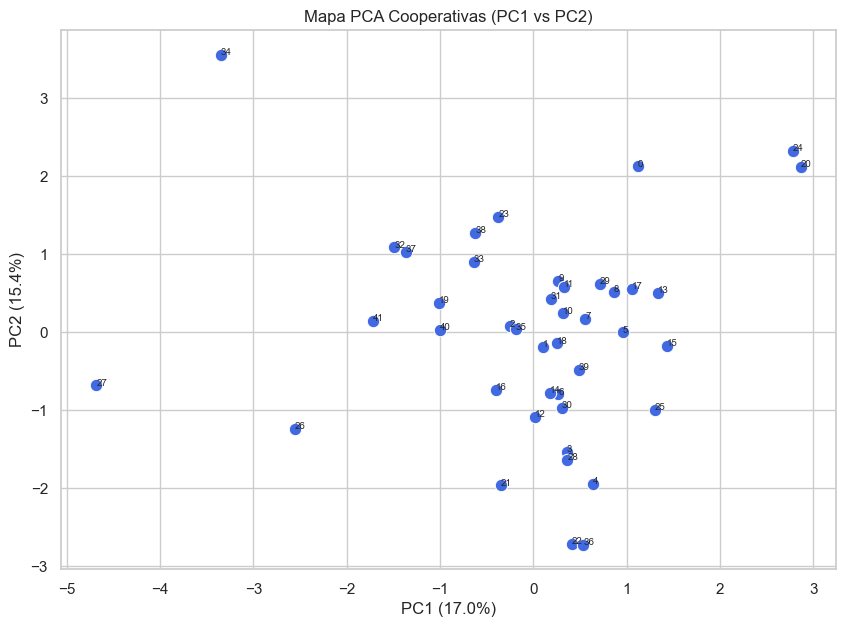

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

# 2) PCA con 3 componentes
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1','PC2','PC3'], index=df_final.index)

# 3) Varianza explicada
exp = pca.explained_variance_ratio_ * 100
print("Varianza explicada por componente:")
for i,v in enumerate(exp):
    print(f"PC{i+1}: {v:.2f}%")

# 4) Plot en 2D
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_pca.PC1, y=df_pca.PC2, s=80, color="royalblue")
for i in df_pca.index:
    plt.text(df_pca.PC1[i], df_pca.PC2[i], i, fontsize=7)
plt.title("Mapa PCA Cooperativas (PC1 vs PC2)")
plt.xlabel(f"PC1 ({exp[0]:.1f}%)")
plt.ylabel(f"PC2 ({exp[1]:.1f}%)")
plt.grid(True)
plt.show()


Clustering

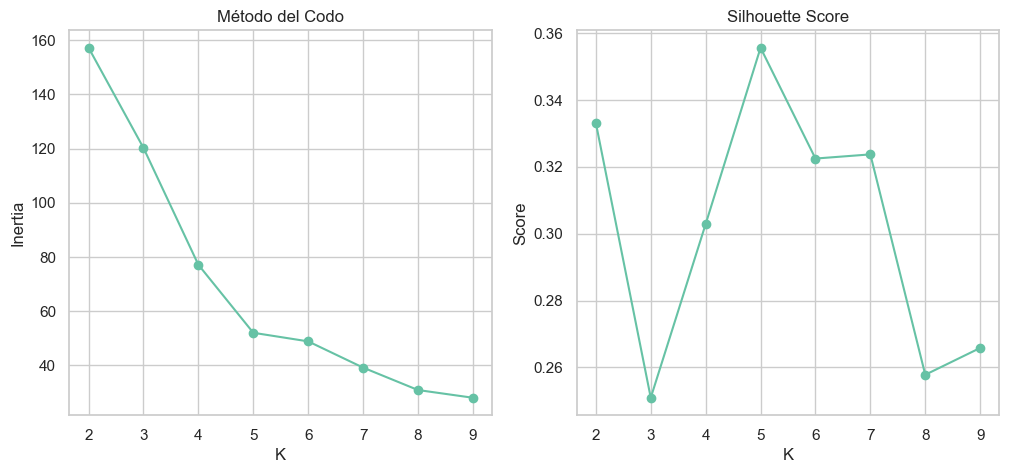

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_pca = df_pca[['PC1','PC2','PC3']]  # usamos 3 principales

distortions = []
sil = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    distortions.append(kmeans.inertia_)
    sil.append(silhouette_score(X_pca, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, distortions, marker='o')
plt.title("Método del Codo")
plt.xlabel("K")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, sil, marker='o')
plt.title("Silhouette Score")
plt.xlabel("K")
plt.ylabel("Score")

plt.show()


K-means

In [61]:
k_optimo = 3   # (cuando ejecutes veremos cuál te da mejor resultado)

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(X_pca)

df_pca.head()


,PC1,PC2,PC3,Cluster
0,1.122748,2.123977,0.489752,0
1,0.100689,-0.190720,-0.289195,2
2,-0.254689,0.073817,-0.927570,2
3,0.358473,-1.530525,-1.450728,2
4,0.642805,-1.947414,-1.037882,2


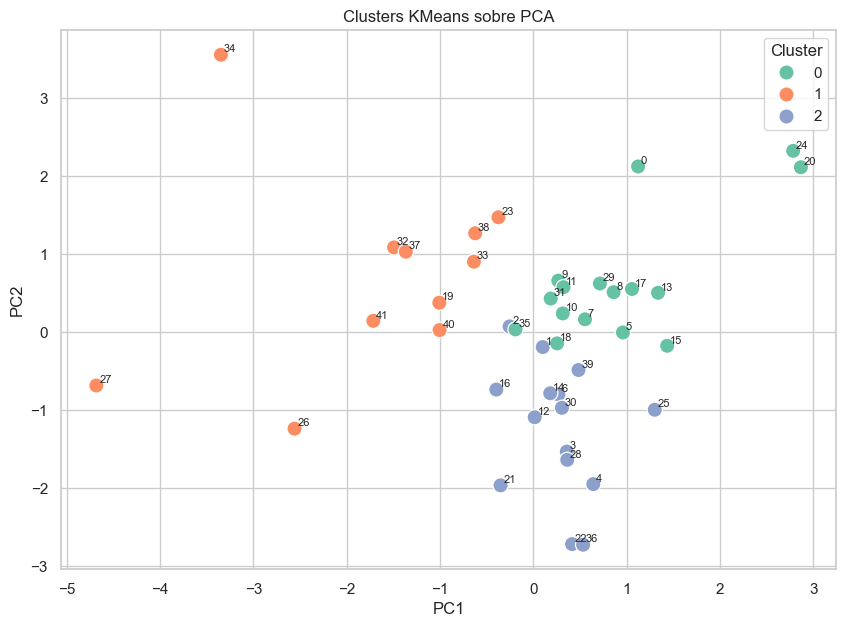

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=120)

for i in df_pca.index:
    plt.text(df_pca.PC1[i]+0.03, df_pca.PC2[i]+0.03, str(i), fontsize=8)

plt.title("Clusters KMeans sobre PCA")
plt.show()


Resumen por cluster

In [63]:
resumen_clusters = df_final.join(df_pca["Cluster"]).groupby("Cluster").mean()
print(resumen_clusters.T)  # para ver variables como filas


Cluster                                                     0         1  \
RANKING                                              2.562500  3.909091   
( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZ... -12.446375  1.486182   
MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO        0.031688  0.192545   
MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO      0.034188  0.078000   
COBERTURA DE LA CARTERA DE CREDITO INMOBILIARIO      1.101000  0.597636   
COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES...   0.000000  0.011636   
RENDIMIENTO DE LA CARTERA DE CREDITO PRODUCTIVO...   0.088000  0.059909   
RENDIMIENTO DE LA CARTERA DE CREDITO CONSUMO         0.148812  0.141091   
RENDIMIENTO DE LA CARTERA DE CREDITO INMOBILIAR...   0.098750  0.130636   
RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO ...   0.010000  0.000000   
FONDOS DISPONIBLES / TOTAL DEPOSITOS A CORTO PL...   0.472813  0.292636   

Cluster                                                      2  
RANKING                           

In [66]:
# Resumen estadístico por cluster (para interpretación)
cluster_profile = df_final.join(df_pca["Cluster"]).groupby("Cluster").mean().T
cluster_profile


Cluster,0,1,2
RANKING,2.562500,3.909091,2.800000
( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZADOS,-12.446375,1.486182,4.554600
MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO,0.031688,0.192545,0.019600
MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO,0.034188,0.078000,0.009467
COBERTURA DE LA CARTERA DE CREDITO INMOBILIARIO,1.101000,0.597636,689.983533
COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES PUBLICO,0.000000,0.011636,0.000000
RENDIMIENTO DE LA CARTERA DE CREDITO PRODUCTIVO POR VENCER,0.088000,0.059909,0.020400
RENDIMIENTO DE LA CARTERA DE CREDITO CONSUMO,0.148812,0.141091,0.142933
RENDIMIENTO DE LA CARTERA DE CREDITO INMOBILIARIO POR VENCER,0.098750,0.130636,0.077200
RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO POR VENCER,0.010000,0.000000,0.000000


In [68]:
# cluster_profile: filas = variables, columnas = clusters
print(cluster_profile)

for cluster in cluster_profile.columns:
    print(f"\n📍 Perfil Cluster {cluster}:")
    c = cluster_profile[cluster]  # Serie: índice = variables, valores = media en ese cluster

    for variable, valor in c.items():
        # media global de esa variable (promedio entre clusters)
        media_global = cluster_profile.loc[variable].mean()

        estado = "alto" if valor > media_global else "bajo"
        print(f" - {variable}: {estado} (cluster: {valor:.3f}, global: {media_global:.3f})")


Cluster                                                     0         1  \
RANKING                                              2.562500  3.909091   
( PATRIMONIO + RESULTADOS ) / ACTIVOS INMOVILIZ... -12.446375  1.486182   
MOROSIDAD DE LA CARTERA DE CREDITO PRODUCTIVO        0.031688  0.192545   
MOROSIDAD DE LA CARTERA DE CREDITO INMOBILIARIO      0.034188  0.078000   
COBERTURA DE LA CARTERA DE CREDITO INMOBILIARIO      1.101000  0.597636   
COBERTURA DE LA CARTERA DE VIVIENDA DE IINTERES...   0.000000  0.011636   
RENDIMIENTO DE LA CARTERA DE CREDITO PRODUCTIVO...   0.088000  0.059909   
RENDIMIENTO DE LA CARTERA DE CREDITO CONSUMO         0.148812  0.141091   
RENDIMIENTO DE LA CARTERA DE CREDITO INMOBILIAR...   0.098750  0.130636   
RENDIMIENTO DE LA CARTERA DE CREDITO EDUCATIVO ...   0.010000  0.000000   
FONDOS DISPONIBLES / TOTAL DEPOSITOS A CORTO PL...   0.472813  0.292636   

Cluster                                                      2  
RANKING                           

In [69]:
# Guardar asignación de clusters
df_resultado = df_final.copy()
df_resultado["Cluster"] = df_pca["Cluster"]

df_resultado.to_csv("cooperativas_clusters_final.csv", index=False)
print("Archivo exportado ✔")


Archivo exportado ✔


In [ ]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.9 MB ? eta -:--:--Requirement already satisfied: packaging in /Users/ulisesfajardo/Documents/ml-cooperativas/ml-cooperativas-ecuador/.venv/lib/python3.13/site-packages (from plotly) (25.0)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px

fig = px.line_polar(
    cluster_profile.reset_index(),
    r="value", theta="variable", color="Cluster",
    line_close=True
)
fig.show()


In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)  # df_scaled es tu dataset estandarizado


In [79]:
# df: original con INSTITUCIÓN, CALIFICACIÓN, RANKING, etc.
# df_pca: resultado del PCA con la columna "Cluster"

# Asegurarnos de que los índices coinciden
print(df.shape[0], df_pca.shape[0])  # deberían ser iguales

# Crear dataframe enriquecido con info de cooperativa + cluster
df_coop_clusters = df.copy()
df_coop_clusters["Cluster"] = df_pca["Cluster"].values

df_coop_clusters.head()[["INSTITUCIÓN", "CALIFICACIÓN", "RANKING", "Cluster"]]


42 42


,INSTITUCIÓN,CALIFICACIÓN,RANKING,Cluster
0,PEQUEÑA EMPRESA DE COTOPAXI LIMITADA,AAA,1,0
1,29 DE OCTUBRE LTDA,AA,2,2
2,ANDALUCIA LIMITADA,AA,2,2
3,ALIANZA DEL VALLE LIMITADA,AA,2,2
4,DE LOS\nSERVIDORES PUBLICOS DEL MINISTERIO DE\...,AA,2,2


In [80]:
df_coop_clusters[["INSTITUCIÓN", "CALIFICACIÓN", "RANKING", "Cluster"]]


,INSTITUCIÓN,CALIFICACIÓN,RANKING,Cluster
0,PEQUEÑA EMPRESA DE COTOPAXI LIMITADA,AAA,1,0
1,29 DE OCTUBRE LTDA,AA,2,2
2,ANDALUCIA LIMITADA,AA,2,2
3,ALIANZA DEL VALLE LIMITADA,AA,2,2
4,DE LOS\nSERVIDORES PUBLICOS DEL MINISTERIO DE\...,AA,2,2
5,RIOBAMBA LTDA,AA,2,0
6,PEQUEÑA EMPRESA DE PASTAZA LIMITADA,AA,2,2
7,ATUNTAQUI LIMITADA,AA,2,0
8,JARDIN AZUAYO LIMITADA,AA,2,0
9,JUVENTUD ECUATORIANA PROGRESISTA\nLIMITADA,AA,2,0
